In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data_df = pd.read_csv('./data_by_all_20230518.csv')


In [ ]:
data_df.head(5)

,ID,fertilizer_price_index_all,fertilizer_price_index_nitrogen,fertilizer_price_index_phosphate,oil_price,meat_total(kg/capita),meat_total_us(lb/capita),fruits(kg/capita),vegetable(kg/capita),coffee_us(gal/capita),...,population_world,population_asia_all,population_asia_east&southeast,cpi_us,gini_us,harvestedarea_rice_asia(ha),yield_rice_asia(hg/ha),production_rice_asia(ton),food_consumption_us(kcal),crop_price_us
0,1900-01,2.687540,9.292814,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,312932.232000,56415.697000,96662.795,8.664286,26.981158,8.572384e+07,5954.0,68840806.0,3007.102825,106.0
1,1900-02,2.701685,9.297349,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,316540.136167,58598.259167,97881.040,8.671429,26.991586,8.576468e+07,5971.0,68840806.0,3007.738058,106.0
2,1900-03,2.715830,9.301883,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,320148.040333,60780.821333,99099.285,8.678571,27.002013,8.580553e+07,5988.0,68840806.0,3008.373292,106.0
3,1900-04,2.729975,9.306417,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,323755.944500,62963.383500,100317.530,8.685714,27.012441,8.584637e+07,6005.0,68840806.0,3009.008525,106.0
4,1900-05,2.744120,9.310951,1.0,7.48391,10.803852,80.945119,34.539159,11.243287,31.117215,...,327363.848667,65145.945667,101535.775,8.692857,27.022868,8.588721e+07,6022.0,68840806.0,3009.643758,106.0


### 미국 CPI 지수 추세 시각화

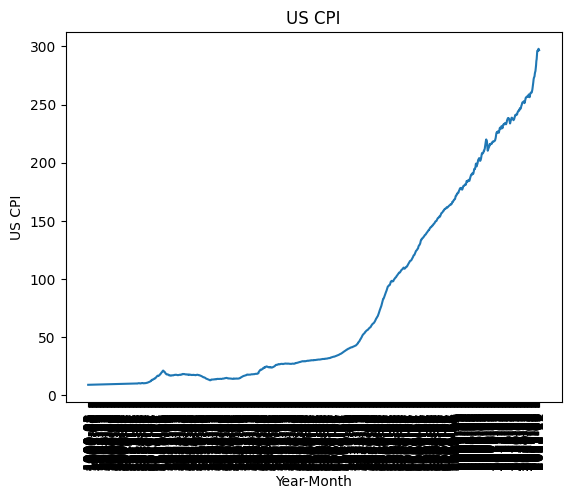

In [ ]:
x = list(data_df['ID'])
y = list(data_df['cpi_us'])

# 그래프 생성
plt.plot(x, y)

# X축 레이블 및 기울기 설정
plt.xticks(rotation=90)
plt.xlabel('Year-Month')

# Y축 레이블 설정
plt.ylabel('US CPI')

# 그래프 제목 설정
plt.title('US CPI')

# 그래프 출력
plt.show()

### 미국 CPI 지수의 각 Feature 와의 상관관계 확인

In [ ]:
#data_df.loc['fertilizer_price_index_all':].corr()['cpi_us'].sort_values(ascending=False)
temp_data=data_df.loc[:, ['fertilizer_price_index_all', 'fertilizer_price_index_nitrogen',
       'fertilizer_price_index_phosphate', 'oil_price',
       'meat_total(kg/capita)', 'meat_total_us(lb/capita)',
       'fruits(kg/capita)', 'vegetable(kg/capita)', 'coffee_us(gal/capita)',
       'tea_us(gal/capita)', 'cocoa_us(lb/capita)', 'co2(ppm)',
       'population_us_total', 'population_us_asian', 'population_world',
       'population_asia_all', 'population_asia_east&southeast', 'cpi_us',
       'gini_us', 'harvestedarea_rice_asia(ha)', 'yield_rice_asia(hg/ha)',
       'production_rice_asia(ton)', 'food_consumption_us(kcal)',
       'crop_price_us']]
temp_data.corr()['cpi_us'].sort_values(ascending=False)

cpi_us                              1.000000
population_us_asian                 0.983484
production_rice_asia(ton)           0.966598
yield_rice_asia(hg/ha)              0.965532
population_world                    0.950643
population_asia_all                 0.950520
crop_price_us                       0.947617
fertilizer_price_index_all          0.941409
fertilizer_price_index_nitrogen     0.934237
population_asia_east&southeast      0.924665
meat_total(kg/capita)               0.919257
fertilizer_price_index_phosphate    0.918930
vegetable(kg/capita)                0.907113
co2(ppm)                            0.894865
population_us_total                 0.893624
gini_us                             0.892887
harvestedarea_rice_asia(ha)         0.892364
food_consumption_us(kcal)           0.891115
oil_price                           0.866901
fruits(kg/capita)                   0.860058
meat_total_us(lb/capita)            0.810999
cocoa_us(lb/capita)                 0.796442
tea_us(gal

### ARIMA 통계 모델(AutoRegressive Integrated Moving Average)을 사용한 시계열 예측

- ARIMA : 시계열 데이터를 분석하고 예측하기 위해 사용, 자기회귀(Auto Regressive), 누적 차분(Integrated), 이동 평균(Moving Average) 세가지 요소를 결합한 모델로 통계적 모델.
- CPI에 Outlier가 없고, 추세가 중요해보임, 장기적인 예측도 할 필요가 없이 앞으로 1~2년 데이터에 대한 예측만을 필요로 하므로 ARIMA를 사용해봄.

---
- p, q : 자기상관 함수, 부분자기상관 함수 - 통계적으로 유의한 시차에서 감소되는 패턴을 파악하여 p, q 값을 설정. 여기서는 p=2, q=0으로 설정하여 자기 상관함수만 값을 줬음. q 값은 이전 예측 오차들의 선형 조합 예측이므로 0을 줘 값을 넣지 않았음. p는 자기 회귀 값을 선형 조합으로 예측하는 값이기 때문에 2를 넣어서 가장 크게 반영 함.
- d : 차분(Differencing) - 시계열 데이터를 정상 시계열로 변환하기 위한 차분(Differencing) 횟수를 의미. 시계열 데이터가 정상성을 가지지 않을 때, 차분을 통해 추세나 계절성 요소를 제거하고 정상성을 확보

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-01-01    3943.437804
2023-02-01    3943.648924
2023-03-01    3943.719329
2023-04-01    3943.602218
2023-05-01    3943.656788
2023-06-01    3943.659403
2023-07-01    3943.639510
2023-08-01    3943.651887
2023-09-01    3943.650262
2023-10-01    3943.647227
2023-11-01    3943.649789
2023-12-01    3943.649092
Freq: MS, Name: predicted_mean, dtype: float64


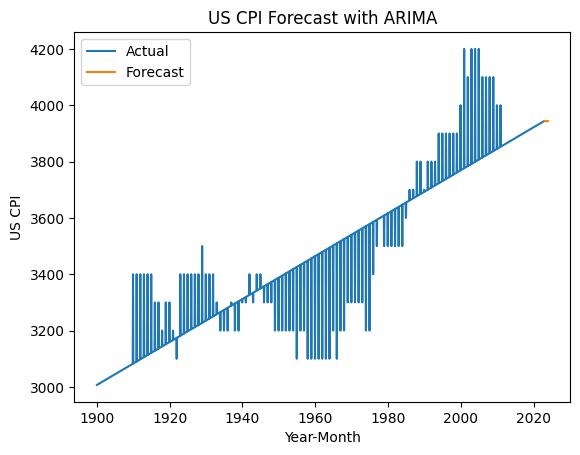

In [ ]:
# 데이터 불러오기
data_arima = data_df.loc[:, ['ID', 'food_consumption_us(kcal)']]

data_arima['ID'] = pd.to_datetime(data_arima['ID'], format='%Y-%m') 
data_arima.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
cpi_data = data_arima['food_consumption_us(kcal)']

p, d, q = 2, 1, 0
# ARIMA 모델 학습
model = ARIMA(cpi_data, order=(p, d, q))
model_fit = model.fit()

# 미래 예측
future_periods = 12 # 미래의 몇 개월까지 예측할 것인지 설정
forecast = model_fit.forecast(steps=future_periods)

# 예측 결과 출력
print(forecast)

# 그래프로 시각화
plt.plot(data_arima, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Year-Month')
plt.ylabel('US CPI')
plt.title('US CPI Forecast with ARIMA')
plt.legend()
plt.show()

### LSTM 모델을 이용한 CPI 지수 예측

- 연-월을 Input으로 넣고 CPI 지수를 target value로 설정
- sequence length를 24로 설정하여 추세를 그리도록 하였음. 2년치의 데이터를 참고하여 다음을 예측하도록 한 것임. 짧은 개월로 학습했을 때는 단시간의 데이터에 대한 경향성을 따라갔으나 24개월로 늘리니 더 긴 경향성을 참고할 수 있게 됐음.

In [ ]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 데이터 불러오기
data_lstm = data_df.loc[:, ['ID', 'cpi_us', 'food_consumption_us(kcal)']]

data_lstm['ID'] = pd.to_datetime(data_lstm['ID'], format='%Y-%m') 
data_lstm.set_index('ID', inplace=True)  # 날짜 열을 인덱스로 설정
cpi_data = data_lstm['cpi_us']

In [ ]:
scaler = MinMaxScaler()  # 데이터 스케일링을 위한 scaler 객체 생성
scaled_data = scaler.fit_transform(cpi_data.values.reshape(-1, 1))  # 데이터 스케일링 적용

In [ ]:
# 시퀀스 데이터 생성
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return torch.tensor(X).float(), torch.tensor(y).float()

In [ ]:
# 전체 데이터셋을 학습시킴

sequence_length = 24  # 시퀀스 길이 설정
X_train, y_train = create_sequences(scaled_data, sequence_length)

<ipython-input-10-bfa3c4346afb>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(X).float(), torch.tensor(y).float()


In [ ]:
# LSTM 모델 구성
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output, _ = self.lstm(x)
        output = output[:, -1, :]
        output = self.fc(output)
        return output

In [ ]:
input_size = 1
hidden_size = 64
output_size = 1

model = LSTMModel(input_size, hidden_size, output_size)

# 모델 학습
learning_rate = 0.001
num_epochs = 100

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

Epoch [10/100], Loss: 0.087987
Epoch [20/100], Loss: 0.067336
Epoch [30/100], Loss: 0.049467
Epoch [40/100], Loss: 0.019966
Epoch [50/100], Loss: 0.006772
Epoch [60/100], Loss: 0.003310
Epoch [70/100], Loss: 0.002078
Epoch [80/100], Loss: 0.000963
Epoch [90/100], Loss: 0.000686
Epoch [100/100], Loss: 0.000507


In [ ]:
# 테스트 데이터 생성 2023-01 부터 2023-12 까지.
test_dates = pd.date_range(start='2020-01', end='2023-12', freq='MS')
print(test_dates)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [ ]:
# 테스트 데이터 예측
with torch.no_grad():
    test_inputs = torch.tensor(scaled_data[-sequence_length:]).unsqueeze(0).float()
    predicted = []
    
    for _ in range(len(test_dates)):
        output = model(test_inputs)
        predicted.append(output.item())
        
        test_inputs = torch.cat((test_inputs[:, 1:, :], output.unsqueeze(0)), dim=1)


In [ ]:
# 예측 결과 출력
predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

for date, prediction in zip(test_dates, predicted):
    print(f'{date.strftime("%Y-%m")}: {prediction:.2f}')

2020-01: 268.81
2020-02: 267.55
2020-03: 266.49
2020-04: 265.48
2020-05: 264.52
2020-06: 263.63
2020-07: 262.80
2020-08: 262.03
2020-09: 261.32
2020-10: 260.65
2020-11: 260.02
2020-12: 259.42
2021-01: 258.85
2021-02: 258.28
2021-03: 257.73
2021-04: 257.16
2021-05: 256.60
2021-06: 256.02
2021-07: 255.43
2021-08: 254.84
2021-09: 254.24
2021-10: 253.65
2021-11: 253.06
2021-12: 252.49
2022-01: 251.94
2022-02: 251.59
2022-03: 251.25
2022-04: 250.93
2022-05: 250.62
2022-06: 250.33
2022-07: 250.06
2022-08: 249.80
2022-09: 249.54
2022-10: 249.30
2022-11: 249.07
2022-12: 248.85
2023-01: 248.64
2023-02: 248.44
2023-03: 248.25
2023-04: 248.06
2023-05: 247.88
2023-06: 247.71
2023-07: 247.55
2023-08: 247.39
2023-09: 247.25
2023-10: 247.11
2023-11: 246.98
2023-12: 246.85


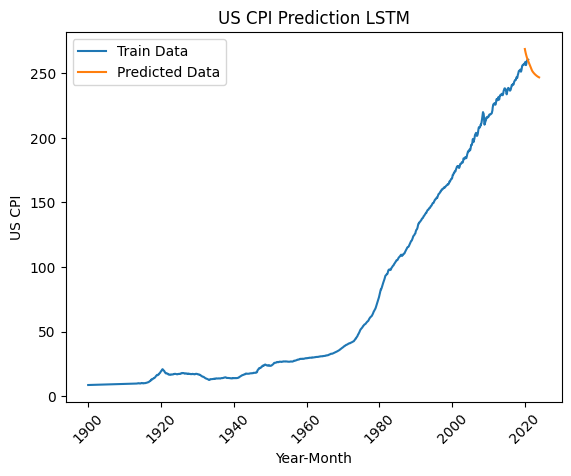

In [ ]:
# 학습 데이터와 예측 결과 시각화
train_dates = data_lstm.index[:-sequence_length]

plt.plot(train_dates, cpi_data[:-sequence_length], label='Train Data')
plt.plot(test_dates, predicted, label='Predicted Data')
plt.xlabel('Year-Month')
plt.ylabel('US CPI')
plt.title('US CPI Prediction LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.show()